In [213]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classifysex/954471/Test/M/121160480_3678313258869851_5818106878740531607_o.jpg
/kaggle/input/classifysex/954471/Test/M/121558243_3459617724076248_4826110803681428223_n.jpg
/kaggle/input/classifysex/954471/Test/M/121218785_2888174644739280_5191976153731649311_n.jpg
/kaggle/input/classifysex/954471/Test/M/121623008_2688765031372476_1265210388791973144_n.jpg
/kaggle/input/classifysex/954471/Test/F/121297902_1739796202838930_2202079621057532442_n.jpg
/kaggle/input/classifysex/954471/Test/F/121711378_1739798592838691_2434137178508018006_n.jpg
/kaggle/input/classifysex/954471/Test/F/121638990_1012059519260274_2330212418373086362_o.jpg
/kaggle/input/classifysex/954471/Test/F/121558240_972714016543857_6033716185027836421_o.jpg
/kaggle/input/classifysex/954471/Train/M/121381660_3348014425282334_9154920501988623614_o.jpg
/kaggle/input/classifysex/954471/Train/M/121543339_3481304788558895_349846518547631903_n.jpg
/kaggle/input/classifysex/954471/Train/M/121222913_2888173951406016_29

In [214]:
test_dir="/kaggle/input/classifysex/954471/Test"
train_dir="/kaggle/input/classifysex/954471/Train"

train_male = train_dir+ '/M'
train_female = train_dir+ '/F'
test_male = test_dir + '/M'
test_female = test_dir + '/F'

In [215]:
print('number of cats training images - ',len(os.listdir(train_male)))
print('number of dogs training images - ',len(os.listdir(train_female)))
print('number of cats testing images - ',len(os.listdir(test_male)))
print('number of dogs testing images - ',len(os.listdir(test_female)))

number of cats training images -  8
number of dogs training images -  8
number of cats testing images -  4
number of dogs testing images -  4


In [216]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        rescale = 1.0/255.0,   # Intensity Normalized
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,   # randomly flip images
        validation_split=0.3)

In [217]:
batch_size = 1
img_height = 64 
img_width  = 64 
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = data_generator.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 12 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [218]:
train_generator.class_indices

{'F': 0, 'M': 1}

In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
# preparing the layers in the Convolutional Deep Neural Network
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = train_generator.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [220]:
fitted_model = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 20)

Epoch 1/20
12/12 [==============================] - 0s 25ms/step - loss: 0.7773 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 2/20
12/12 [==============================] - 0s 13ms/step - loss: 0.7718 - accuracy: 0.1667 - val_loss: 0.6873 - val_accuracy: 0.5000
Epoch 3/20
12/12 [==============================] - 0s 13ms/step - loss: 0.7252 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 4/20
12/12 [==============================] - 0s 13ms/step - loss: 0.6873 - accuracy: 0.6667 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 5/20
12/12 [==============================] - 0s 12ms/step - loss: 0.6707 - accuracy: 0.6667 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 6/20
12/12 [==============================] - 0s 13ms/step - loss: 0.7691 - accuracy: 0.6667 - val_loss: 0.6837 - val_accuracy: 0.5000
Epoch 7/20
12/12 [==============================] - 0s 12ms/step - loss: 0.6927 - accuracy: 0.6667 - val_loss: 0.6848 - val_accuracy: 0.5000
Epoch 8/20
12

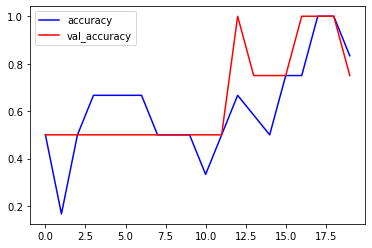

In [221]:
import matplotlib.pyplot as plt
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b-', label = 'accuracy')
plt.plot(range(len(val_accuracy)), val_accuracy, 'r-', label = 'val_accuracy')
plt.legend()

# #Male

In [232]:
from tensorflow.keras.preprocessing import image
# testing the model

test_image = image.load_img('../input/classifysex/954471/Test/F/121558240_972714016543857_6033716185027836421_o.jpg', target_size = (img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(np.round(result))

[[0.]]


In [223]:
from tensorflow.keras.preprocessing import image
# testing the model

test_image = image.load_img('../input/classifysex/954471/Test/M/121218785_2888174644739280_5191976153731649311_n.jpg', target_size = (img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(np.round(result))

[[1.]]


In [224]:
from tensorflow.keras.preprocessing import image
# testing the model

test_image = image.load_img('../input/classifysex/954471/Test/M/121558243_3459617724076248_4826110803681428223_n.jpg', target_size = (img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(np.round(result))

[[1.]]


In [225]:
from tensorflow.keras.preprocessing import image
# testing the model

test_image = image.load_img('../input/classifysex/954471/Test/M/121623008_2688765031372476_1265210388791973144_n.jpg', target_size = (img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(np.round(result))

[[1.]]


# #Female

In [226]:
from tensorflow.keras.preprocessing import image
# testing the model

test_image = image.load_img('../input/classifysex/954471/Test/F/121297902_1739796202838930_2202079621057532442_n.jpg', target_size = (img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(np.round(result))

[[0.]]


In [230]:
from tensorflow.keras.preprocessing import image
# testing the model

test_image = image.load_img('../input/classifysex/954471/Test/F/121558240_972714016543857_6033716185027836421_o.jpg', target_size = (img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(np.round(result))

[[0.]]


In [228]:
from tensorflow.keras.preprocessing import image
# testing the model

test_image = image.load_img('../input/classifysex/954471/Test/F/121638990_1012059519260274_2330212418373086362_o.jpg', target_size = (img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(np.round(result))

[[0.]]


In [229]:
from tensorflow.keras.preprocessing import image
# testing the model

test_image = image.load_img('../input/classifysex/954471/Test/F/121711378_1739798592838691_2434137178508018006_n.jpg', target_size = (img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(np.round(result))

[[0.]]
